<div >
<h1> 2D figures</h1>
<img src="data/logo_EUZERT.png" width=350 style="float:right;"> </img>
</div>

In most cases, the most simple figures are the best. In what follows, we are going to cover some simple plotting methods that include the most common plot types.  The module `matplotlib` offers several different way to create the same figure, we'll try to do our best in introducing only the simplest concepts. We are only going to go through some of the keyword arguments of `matplotlib`'s functions, though. Therefore, look for more parameters in the `matplotlib` [example galleries](http://matplotlib.org/gallery.html#), or in the docstrings of `plot`, `hist`, `pcolor`, `contour` and `contourf` functions.

In [1]:
# import libraries
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# import numpy
# import matplotlib
# from matplotlib import pylab, mlab, pyplot
# np = numpy
# plt = pyplot

# from IPython.display import display
# from IPython.core.pylabtools import figsize, getfigs

# from pylab import *
# from numpy import *

## Simple function and data plot

In many cases, we would like to plot some data or an analytic function. If we want to plot a function, then first we have to create some points that we evaulate later with the function. In the next example, we are going to evaulate the function $\sin(x)$ on the $[-\pi,\pi]$ interval in 25 points.

In [2]:
x=linspace(-pi,pi,25);
y=sin(x);

The plotting is done by the `plot` function.

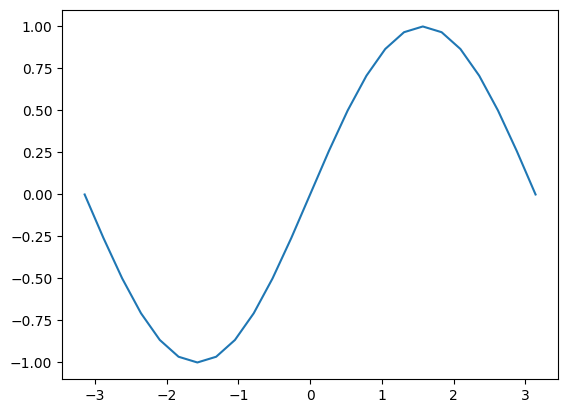

In [3]:
plot(x,y)

Let us examine some keyword arguments, that alter the output of the `plot` command. The keyword `color` changes the colour of the plotted data. [This](http://matplotlib.org/_images/named_colors.png) figure contains all the colours used in `matplotlib`. Let us change the color of the curve in the next figure.

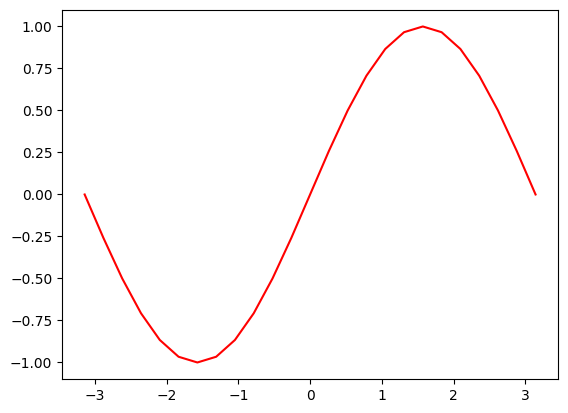

In [4]:
plot(x,sin(x),color='red')

With the help of the keyword `linewidth`, we can change the width of the plotted line.

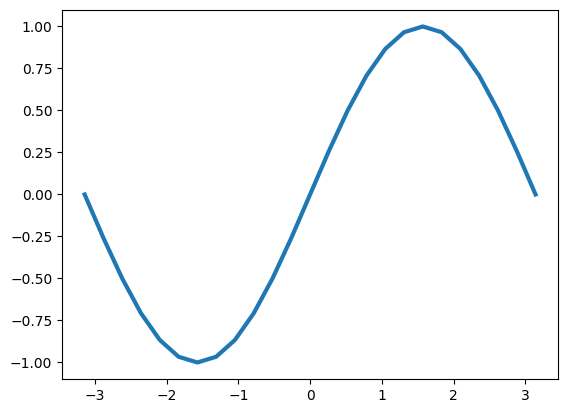

In [5]:
plot(x,sin(x),linewidth=3)

The keyword `linestyle` sets the style of the plotted line. Its value can be either a string with a meaning, like `'dashed'`, or some [symbols](http://matplotlib.org/_images/line_styles_reference.png).

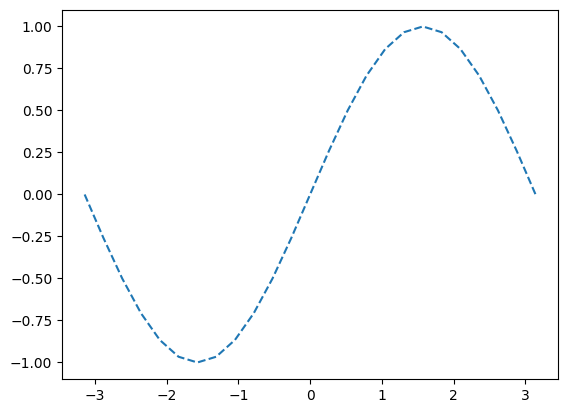

In [6]:
plot(x,sin(x),linestyle='dashed') # dashed line

If we give it an empty string, and we use the keyword `marker`, then the figure is only going to displey points. This way, we can also plot unordered data.

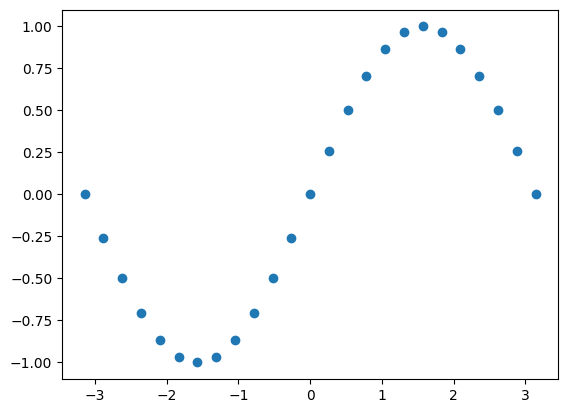

In [7]:
plot(x,sin(x),linestyle='',marker='o')

By using both keywords at once, the markers are going to be connected by a line in the given style.

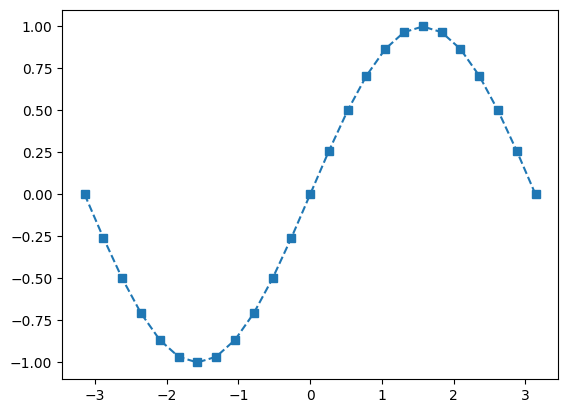

In [8]:
plot(x,sin(x),linestyle='dashed',marker='s')

Of course, we can set many more keyword arguments. What do they do?

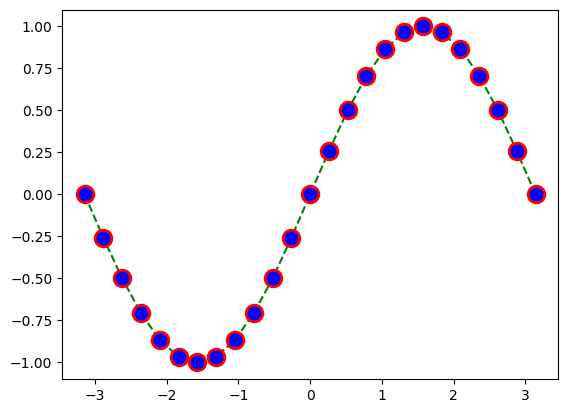

In [9]:
props=dict(color='green', linestyle='dashed', marker='o', markerfacecolor='blue',
               markeredgecolor='red',markeredgewidth=2, markersize=12 )

plot(x, sin(x), **props)

We can set the axis limits with the `xlim()` and `ylim()` commands, which have to be called after the `plot` function.

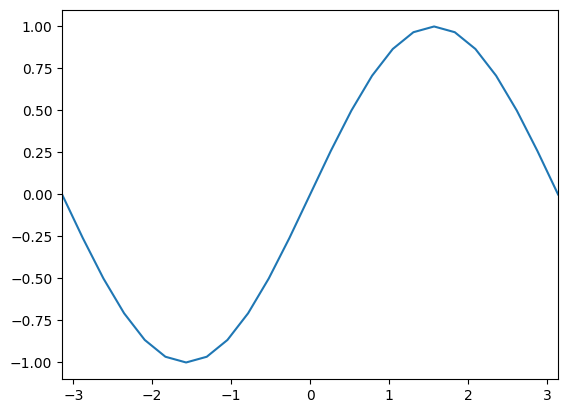

In [10]:
plot(x,sin(x))
xlim(-pi,pi);

The `plot` function has many more keyword arguments. In its docstring, these are very well documented.

In [11]:
help(plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on 

### Multiple plots on the same figure

If we give two or more `plot` commands after each other in one cell, then two or more functions are going to be plotted in the figure.

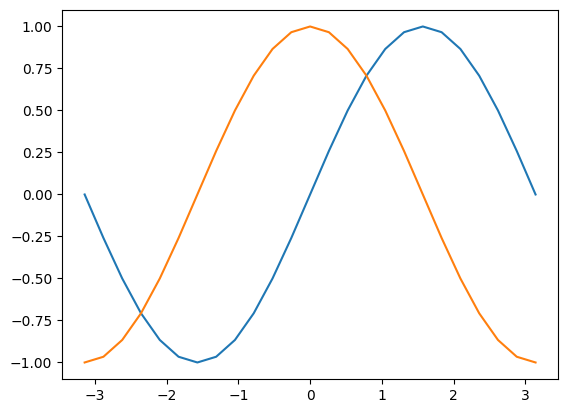

In [12]:
plot(x,sin(x))
plot(x,cos(x))

A special case is when one `plot` command only contains a single point. With this method, we can mark interesing points on the function graph.

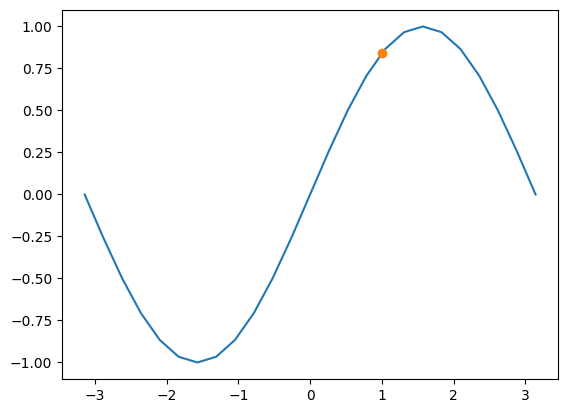

In [13]:
plot(x,sin(x))
plot(1,sin(1),'o')

If we plot more functions, then the `label` keyword and the `legend()` function help in matching the functions to the plotting styles.

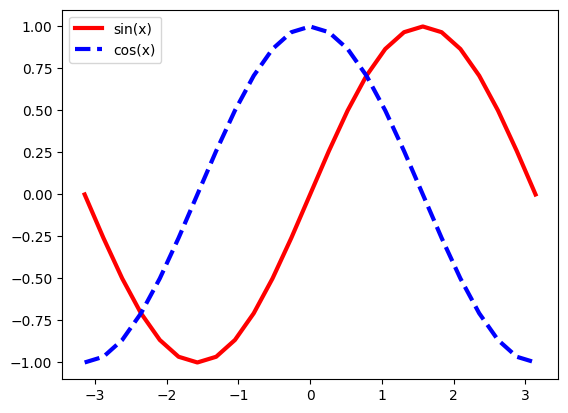

In [14]:
plot(x,sin(x),label='sin(x)',color='red',linestyle='-',linewidth=3)
plot(x,cos(x),label='cos(x)',color='blue',linestyle='--',linewidth=3)
legend()

The functions `xlabel()` and `ylabel()` create axis labels.

Text(0, 0.5, 'kiteres')

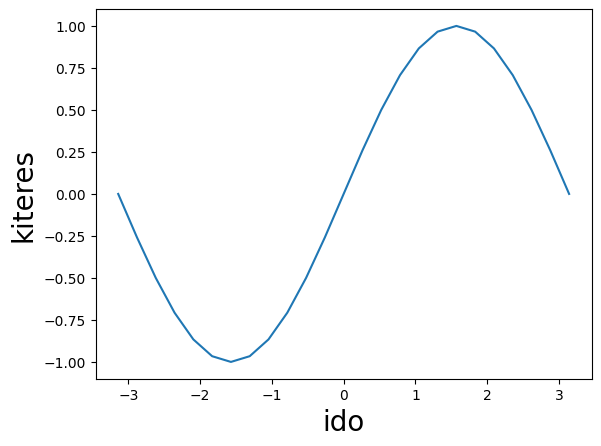

In [15]:
plot(x,sin(x))
xlabel(r'ido',fontsize=20)
ylabel('kiteres',fontsize=20)

The functions `xticks()` and `yticks()` format the axis ticks. Have a look at their docstrings!

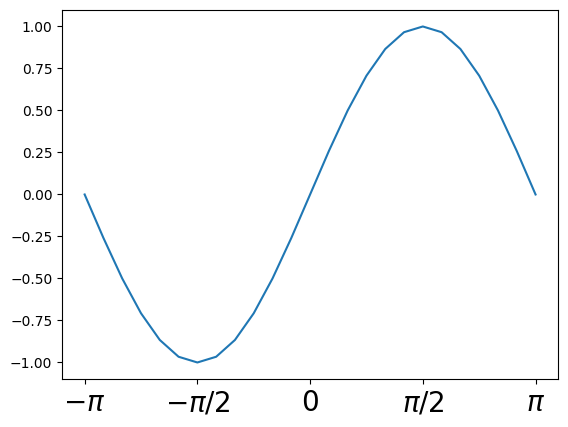

In [16]:
plot(x,sin(x))
xticks([-pi,-pi/2,0,pi/2,pi],[r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'],fontsize=20);
yticks(linspace(-1,1,9)); 
# what has changed?

Finally, let us look at an example, that uses almost all of the above tricks, and that creates a publication-quality figure.

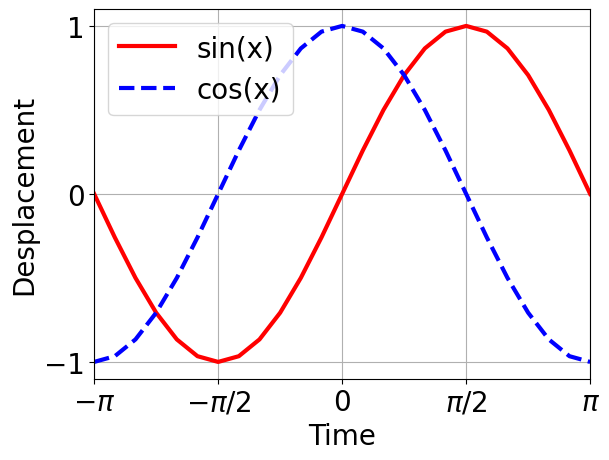

In [17]:
plot(x,sin(x),label='sin(x)',color='red',linestyle='-',linewidth=3)
plot(x,cos(x),label='cos(x)',color='blue',linestyle='--',linewidth=3)
xticks([-pi,-pi/2,0,pi/2,pi],[r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'],fontsize=20);
yticks(linspace(-1,1,3),fontsize=20);
xlabel('Time',fontsize=20)
ylabel('Desplacement',fontsize=20)
legend(loc='upper left',fontsize=20)
xlim(-pi,pi)
grid(True) # what does this function do?

Many other plotting functions inherit the same keyword arguments from the original `plot` function. For example, we can use the same styling arguments for the 3D plotting as well. Labelling and formatting the axes is also general in `matplotlib`, not just for the `plot()` command. 

## Plotting measurement data with error

We can even plot measurement data with the `plot()` function. But measurement data is often loaded with error. Let us see a simple example! In the following, we are going to use a real sunspot measurement datafile for the sample commands. The datafile can be found in the `data` subdirectory as `SN_m_tot_V2.0.txt`. First, we have to load the content of the file into `Python`. We can do that by using the `loadtxt` function of the `numpy` module. This function loads simply structured data into an `array`.

In [2]:
dat=loadtxt('data/SN_m_tot_V2.0.txt'); # loading sunspot datafile

In [3]:
dat

array([[ 1.749000e+03,  1.000000e+00,  1.749042e+03,  9.670000e+01,
        -1.000000e+00, -1.000000e+00],
       [ 1.749000e+03,  2.000000e+00,  1.749123e+03,  1.043000e+02,
        -1.000000e+00, -1.000000e+00],
       [ 1.749000e+03,  3.000000e+00,  1.749204e+03,  1.167000e+02,
        -1.000000e+00, -1.000000e+00],
       ...,
       [ 2.015000e+03,  6.000000e+00,  2.015455e+03,  6.830000e+01,
         6.700000e+00,  7.540000e+02],
       [ 2.015000e+03,  7.000000e+00,  2.015538e+03,  6.640000e+01,
         5.500000e+00,  8.630000e+02],
       [ 2.015000e+03,  8.000000e+00,  2.015623e+03,  6.460000e+01,
         5.000000e+00,  7.680000e+02]])

The above command loaded into the `dat` array the data from the file. The third column of the file contains the time of the observation in years, the fourth contains the number of sunspots observed. Let's plot the last hundred points from the datafile.

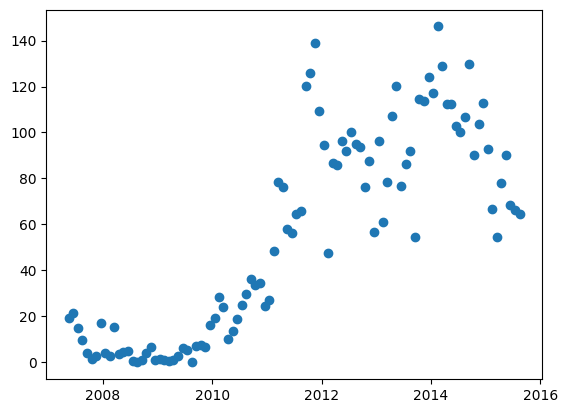

In [19]:
plot(dat[-100:,2],dat[-100:,3],linestyle='',marker='o')

The fifth column contains the statistical errors of the measurements. If we want to see the datapoints and their error on the same figure, we can do it by using the `errorbar()` function.

<ErrorbarContainer object of 3 artists>

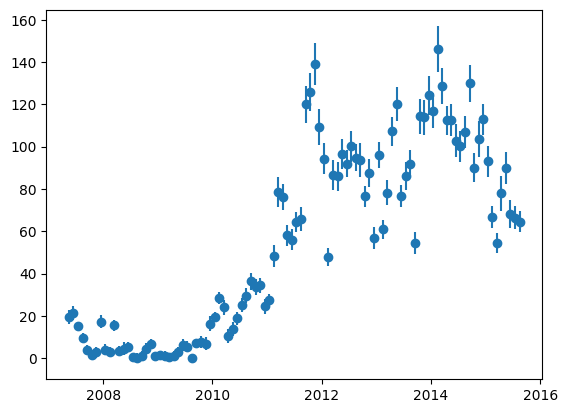

In [20]:
errorbar(dat[-100:,2],dat[-100:,3],dat[-100:,4],linestyle='',marker='o')

The `errorbar()` function expects three columns, the first two for the position of the datapoints, and the third for the error. Similary to `plot()`, we can control its appearance through keyword arguments. The next example illustrates some of them:

<ErrorbarContainer object of 3 artists>

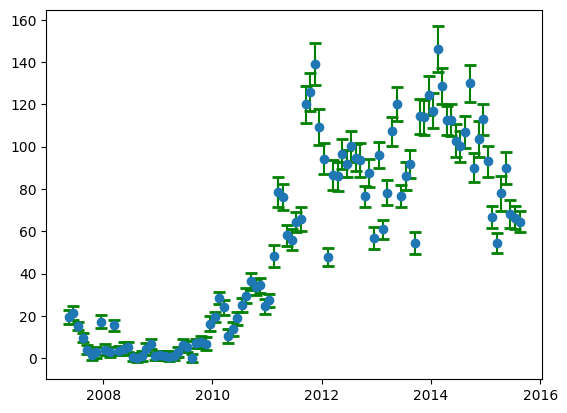

In [21]:
props=dict(linestyle='',marker='o',ecolor='green',capsize=4,capthick=2)
errorbar(dat[-100:,2],dat[-100:,3],dat[-100:,4],**props)

We can get further information on the options from the docstring:

In [22]:
help(errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x: 'float | ArrayLike', y: 'float | ArrayLike', yerr: 'float | ArrayLike | None' = None, xerr: 'float | ArrayLike | None' = None, fmt: 'str' = '', ecolor: 'ColorType | None' = None, elinewidth: 'float | None' = None, capsize: 'float | None' = None, barsabove: 'bool' = False, lolims: 'bool | ArrayLike' = False, uplims: 'bool | ArrayLike' = False, xlolims: 'bool | ArrayLike' = False, xuplims: 'bool | ArrayLike' = False, errorevery: 'int | tuple[int, int]' = 1, capthick: 'float | None' = None, *, data=None, **kwargs) -> 'ErrorbarContainer'
    Plot y versus x as lines and/or markers with attached errorbars.
    
    *x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
    sizes. By default, this draws the data markers/lines as well as the
    errorbars. Use fmt='none' to draw errorbars without any data markers.
    
    .. versionadded:: 3.7
       Caps and error lines are drawn in polar coordinates on pola

We can put the two types of plots onto one figure as well. The next example shows the result of the simultaneous usage of the `plot()` and `errorbar()` functions.

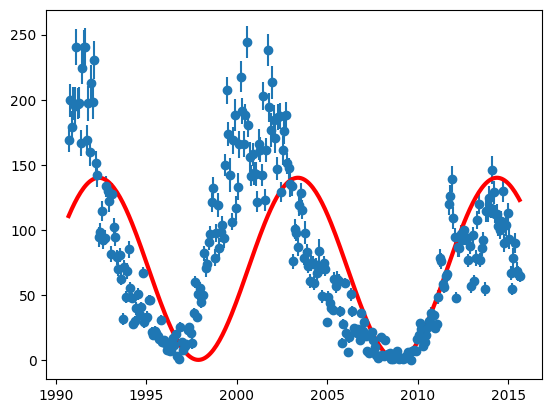

In [23]:
errorbar(dat[-300:,2],dat[-300:,3],dat[-300:,4],linestyle='',marker='o')
plot(dat[-300:,2],70*cos(2*pi/11*dat[-300:,2]-pi*0.25)+70,color='red',linewidth=3)

## Histograms

[Histograms](https://en.wikipedia.org/wiki/Histogram) are important tools for statistical analysis. Let's see further examples for keyword arguments of the `hist` function! First, let us generate some random numnbers.

In [24]:
measurement1=randn(10000);
measurement2=random.normal(2,0.5,10000);

As we've already seen, the most simple way of creating a histogram is:

(array([   9.,  128.,  716., 1983., 2991., 2663., 1150.,  307.,   49.,
           4.]),
 array([-3.74865532, -2.95537901, -2.1621027 , -1.36882639, -0.57555008,
         0.21772623,  1.01100254,  1.80427885,  2.59755516,  3.39083147,
         4.18410778]),
 <BarContainer object of 10 artists>)

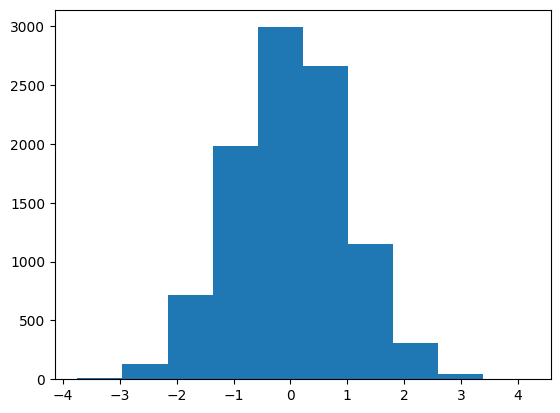

In [25]:
hist(measurement1)

If we want to increase the histogram's resolution, we can achive it through the `bins` argument. If `bins` receives a number as an input, then the number of 'categories' will be equal to `bins` on the histogram.

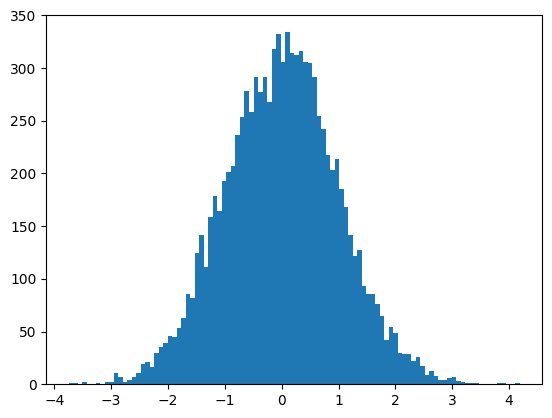

In [26]:
hist(measurement1,bins=100);

But we can give the edges of the bins arbitrarily with the help of a list!

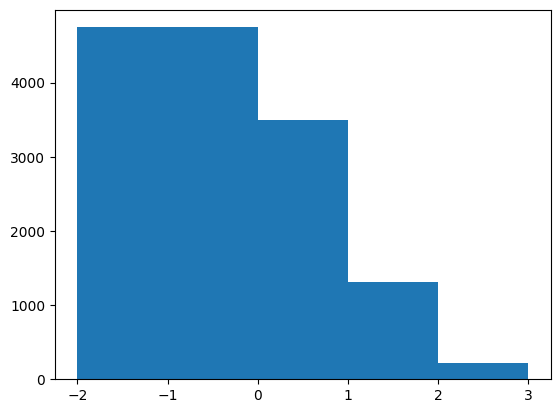

In [27]:
hist(measurement1,bins=[-2,0,1,2,3]);

If we would like to use a continuous line instead of bars, then the keyword argument `histtype` can be used.

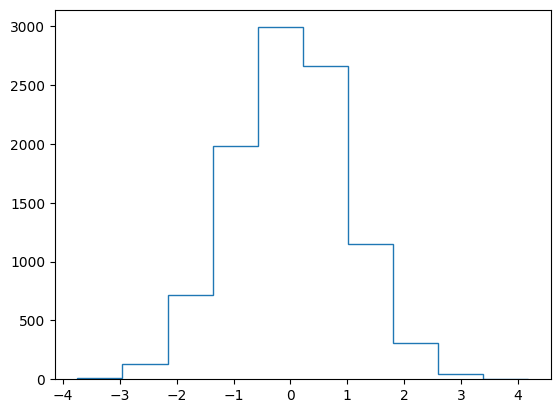

In [28]:
hist(measurement1,histtype='step');

More histograms can be put onto one figure.

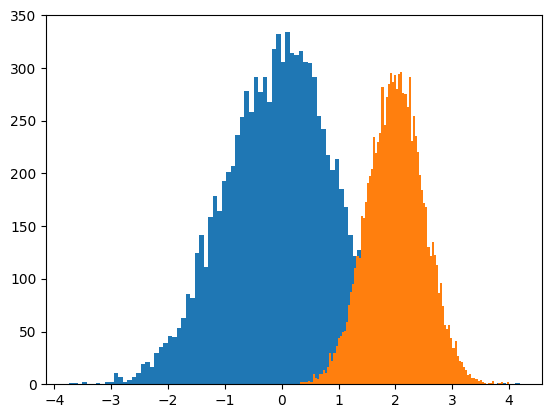

In [29]:
hist(measurement1,bins=100,linewidth=0);
hist(measurement2,bins=100,linewidth=0);

If two distributions would cover each other by too much, the keyword `alpha` helps in making them transparent to a certain degree.

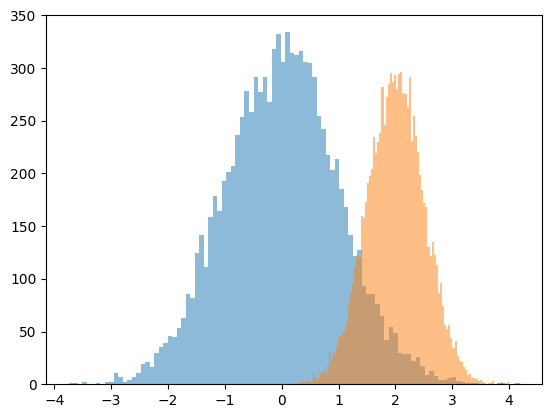

In [30]:
hist(measurement1,bins=100,linewidth=0,alpha=0.5);
hist(measurement2,bins=100,linewidth=0,alpha=0.5);

## Bivariate plotting, contour plots, heatmaps

The display of bivariate functions is very similar to that of univariate functions, and begins with sampling or data collection. The already known `linspace()` function combined with the `meshgrid()` function can sample a 2D parameter space:

Function to be plotted: $$z = \sin(x)^{10} + \cos(10+y+x)\cos(x)$$

In [31]:
x2,y2 = meshgrid(linspace(-4,4,50),linspace(-3,3,50)) # sampling points
z2 = sin(x2) ** 10 + cos(10 + y2 * x2) * cos(x2)          # function evaluation

The above code thus generated three arrays. The first two contain the $x$ and $y$ coordinates of sampling points in a ford of two 2D arrays. The variable `z2` contains the value of the function at those points. 

Here is an illustration for a meshgrid:

<img src="data/8Mbig.png" />

We only have to plot now! This is done by the `pcolor()` function (pseudocolor plot).

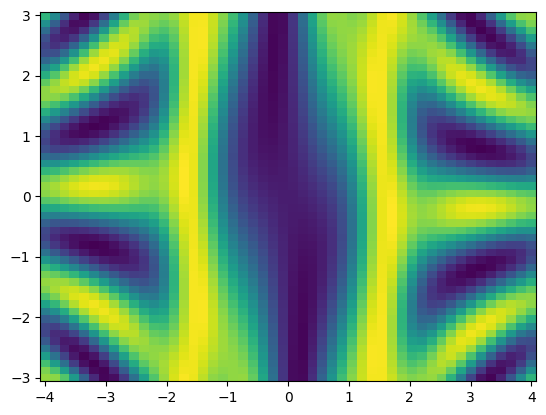

In [32]:
pcolor(x2,y2,z2)

The meaning of the colour code can be visualized with the help of the `colorbar()` function.

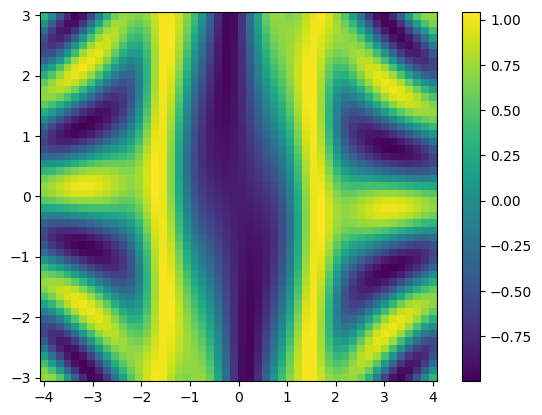

In [33]:
pcolor(x2,y2,z2)
colorbar()

There are many colour scales. Each has its own advantages and disadvantages. The [colour scales](http://matplotlib.org/examples/color/colormaps_reference.html) of `matplotlib ` can be evoked by the keyword `cmap` using their names.

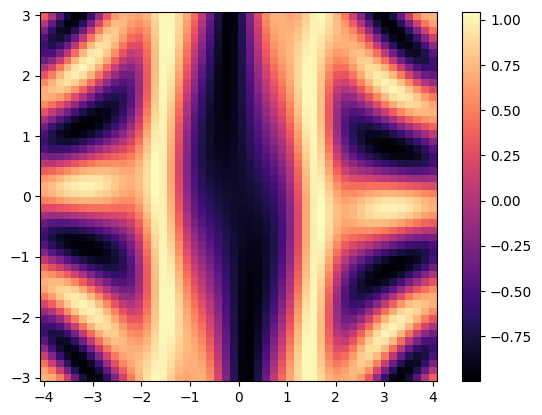

In [34]:
pcolor(x2,y2,z2,cmap='magma')
colorbar()

Bivariate functions can be visualized using contour lines. A countour line consists of points, where the given bivariate function has the same value. The function `contour()` generates these contour lines for us:

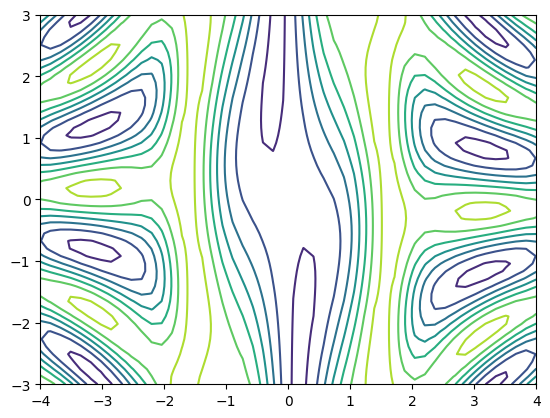

In [35]:
contour(x2,y2,z2)

If we are only interested in given contour values, we can address them by using the `levels` keyword.

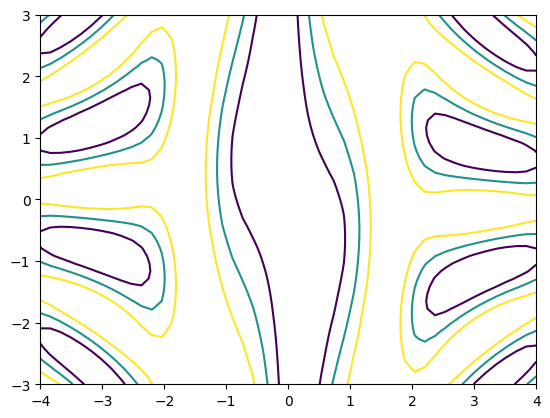

In [36]:
contour(x2,y2,z2,levels=[-0.5,0,0.5])

Uding the `clabel()` function, the values are displayed on the lines.

<a list of 34 text.Text objects>

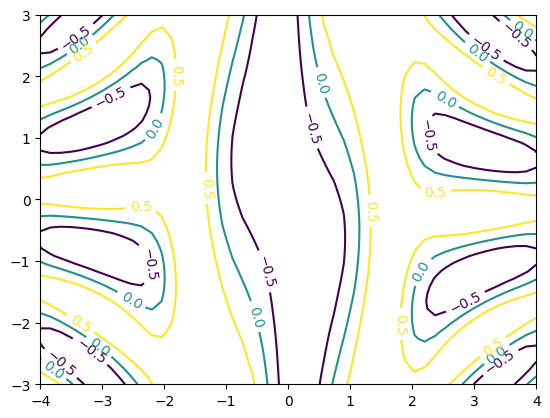

In [37]:
cs=contour(x2,y2,z2,levels=[-0.5,0,0.5])
clabel(cs)

The function `contourf` unites the good properties of the `pcolor()` and `contour()` functions. Its coloured figures fit eh shape of the visualized function better.

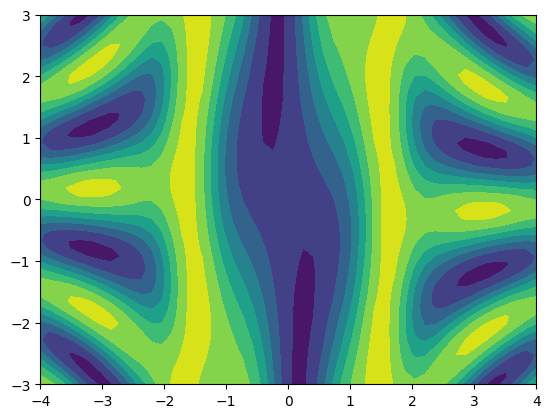

In [38]:
contourf(x2,y2,z2)

The keyword `levels` can increase the resolution.

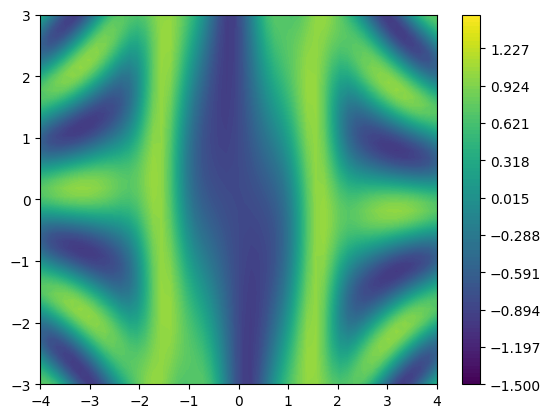

In [39]:
contourf(x2,y2,z2,levels=linspace(-1.5,1.5,100))
colorbar()

It may occur, that the sampling is not uniform. Then, we can visualize datapoints using [triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation). Let us create some random points on the plane!

In [40]:
tx,ty = [8*rand(50*50)-4,6*rand(50*50)-3]                 # sampling points

Let us evaulate the function in these random points!

In [41]:
tz = sin(tx) ** 10 + cos(10 + ty * tx) * cos(tx)          # function evaluation

If the data points are unordered, then we have to use the functions `tripcolor()`, `tricontour()` and `tricontourf()` instead of the functions `pcolor()`, `contour()` and `contourf()` in the same manner as before.

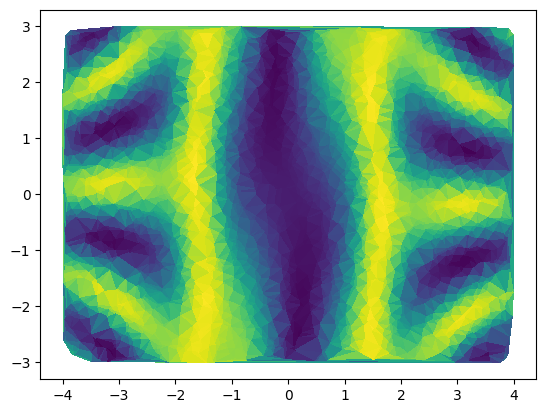

In [42]:
tripcolor(tx,ty,tz)

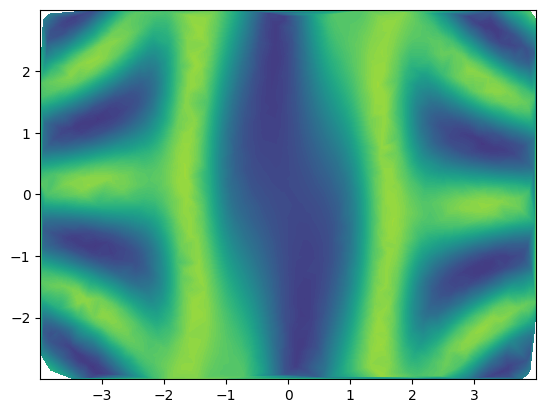

In [43]:
tricontourf(tx,ty,tz,linspace(-1.5,1.5,100))

## Vector fields, arrows and field lines

In physics, we use vector fields quite often. Let us think of meteorology or electrodynamics. Let us create the gradient of the previously plotted function. The gradient vector in the plane is given by the following:

$$u=-y\sin(xy + 10)\cos(x) + 10\sin(x)^9\cos(x) - \sin(x)\cos(xy + 10)$$
$$v=-x\sin(xy + 10)\cos(x)$$

In [44]:
u=-y2*sin(x2*y2 + 10)*cos(x2) + 10*sin(x2)**9*cos(x2) - sin(x2)*cos(x2*y2 + 10)
v=-x2*sin(x2*y2 + 10)*cos(x2)

The funciton `quiver()` assigns a vector given by the arrays `u` and `v` to every point defined on the plane by the arrays `x2` and `y2`. Thus, in every point `(x2[i],y2[i])`, there is a vector `(u[i],v[i])`!

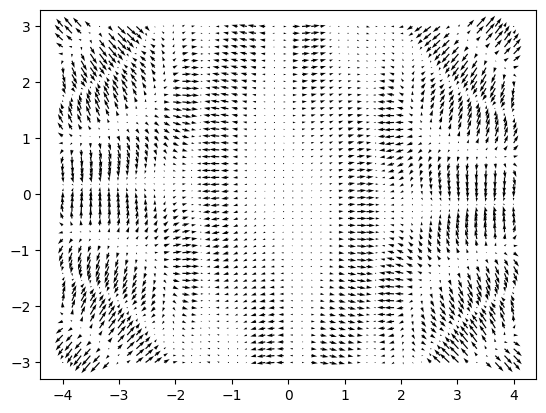

In [45]:
quiver(x2,y2,u,v)

Let us draw only every third vector in red and a bit thicker.

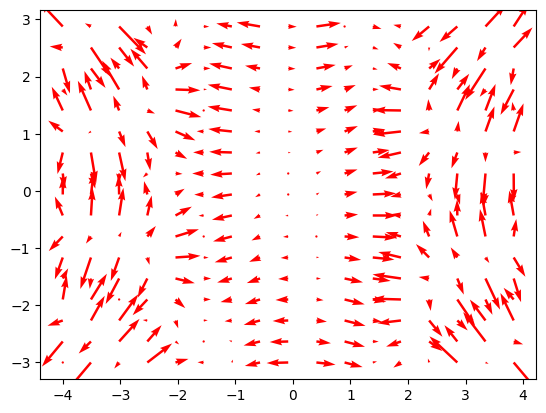

In [46]:
quiver(x2[::3, ::3], y2[::3, ::3], u[::3, ::3], v[::3, ::3],
    color='red',width=0.005)

For further details, see the documentation.

In [47]:
help(quiver)

Help on function quiver in module matplotlib.pyplot:

quiver(*args, data=None, **kwargs) -> 'Quiver'
    Plot a 2D field of arrows.
    
    Call signature::
    
      quiver([X, Y], U, V, [C], **kwargs)
    
    *X*, *Y* define the arrow locations, *U*, *V* define the arrow directions, and
    *C* optionally sets the color.
    
    **Arrow length**
    
    The default settings auto-scales the length of the arrows to a reasonable size.
    To change this behavior see the *scale* and *scale_units* parameters.
    
    **Arrow shape**
    
    The arrow shape is determined by *width*, *headwidth*, *headlength* and
    *headaxislength*. See the notes below.
    
    **Arrow styling**
    
    Each arrow is internally represented by a filled polygon with a default edge
    linewidth of 0. As a result, an arrow is rather a filled area, not a line with
    a head, and `.PolyCollection` properties like *linewidth*, *edgecolor*,
    *facecolor*, etc. act accordingly.
    
    
    Parameter

An alternative to `quiver()` is the plotting of the field lines, or `streamplot()`.

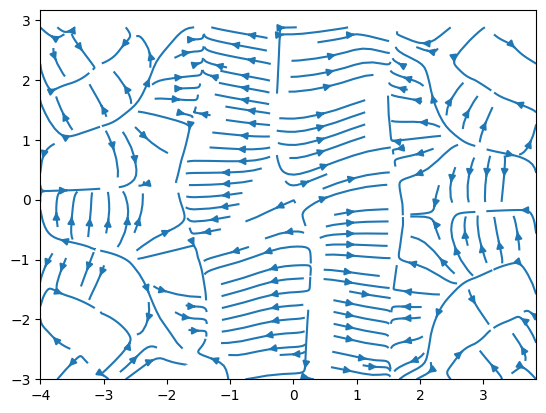

In [48]:
streamplot(x2[::3, ::3], y2[::3, ::3], u[::3, ::3], v[::3, ::3])

For further details, see the documentation.

In [49]:
help(streamplot)

Help on function streamplot in module matplotlib.pyplot:

streamplot(x, y, u, v, density=1, linewidth=None, color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', minlength=0.1, transform=None, zorder=None, start_points=None, maxlength=4.0, integration_direction='both', broken_streamlines=True, *, data=None)
    Draw streamlines of a vector flow.
    
    Parameters
    ----------
    x, y : 1D/2D arrays
        Evenly spaced strictly increasing arrays to make a grid.  If 2D, all
        rows of *x* must be equal and all columns of *y* must be equal; i.e.,
        they must be as if generated by ``np.meshgrid(x_1d, y_1d)``.
    u, v : 2D arrays
        *x* and *y*-velocities. The number of rows and columns must match
        the length of *y* and *x*, respectively.
    density : float or (float, float)
        Controls the closeness of streamlines. When ``density = 1``, the domain
        is divided into a 30x30 grid. *density* linearly scales this grid.
        Each cell in 

`streamplot()` and `quiver()` may be used together with `pcolor()` and contour-making routines.

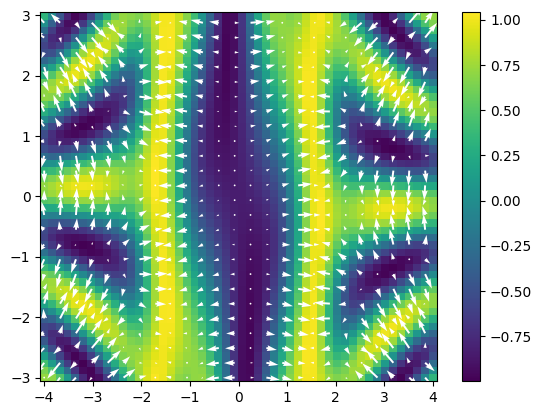

In [50]:
pcolor(x2,y2,z2)
colorbar()
quiver(x2[::2,::2],y2[::2,::2],u[::2,::2],v[::2,::2],color='white',width=0.005)

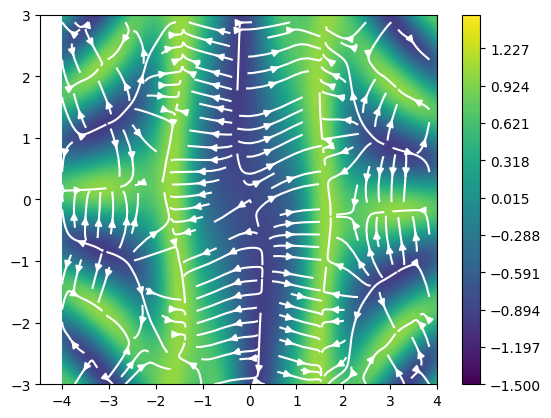

In [51]:
contourf(x2,y2,z2,levels=linspace(-1.5,1.5,100))
colorbar()
streamplot(x2[::3, ::3], y2[::3, ::3], u[::3, ::3], v[::3, ::3],color='white')

## Labelling, arrows and figure arrays

When finishing a figure, we may be in need of an annotation here and there, or we'd like to highlight certain parts of the figure. We can do that by using the `text()` and the `annotation()` functions. The function `text()` has three input arguments, the first two being coordinates, the thrid a string. Let us see an example!

Text(-3, 0, 'This is another label.')

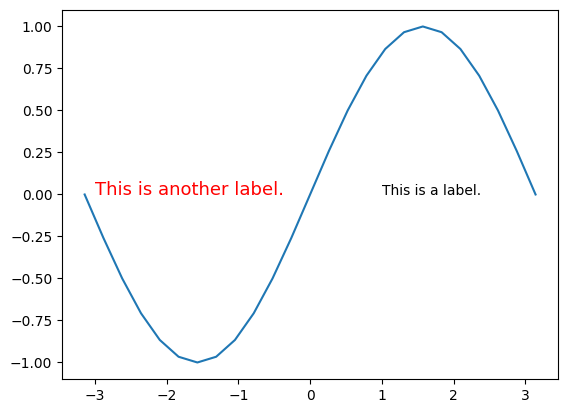

In [52]:
plot(x,y);
text(1,0,'This is a label.')
text(-3,0,'This is another label.',fontsize=13,color='red')

If we want to emphasize a certain part, then the best option is the function `annotate()`. This puts a pointing arrow and an explanation text onto the figure. The first input argument is a string, that is the explanation, and apart from that, we can control the behaviour of the function using keyword arguments. The keyword `xy` is the position of the point we want to highlight. The keyword `xytext` contains the explanation itself, and `arrowprops` is a dictionary that defined the properties of the arrow.

Text(-3.141592653589793, 0.5, 'local minimum')

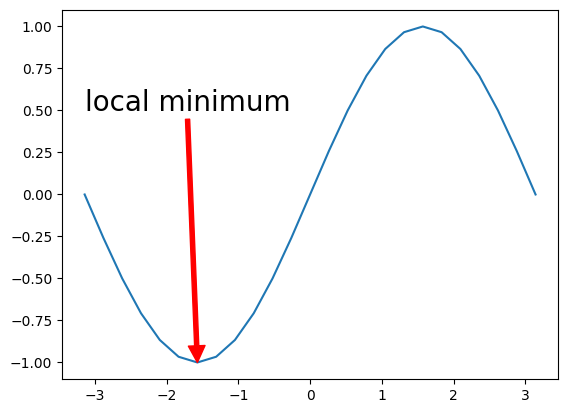

In [53]:
plot(x,y)
annotate('local minimum', xy=(-pi/2, -1), xytext=(-pi, 0.5),arrowprops=dict(color='red',width=3),fontsize=20)

In [54]:
?annotate

Signature:
annotate(
    text: 'str',
    xy: 'tuple[float, float]',
    xytext: 'tuple[float, float] | None' = None,
    xycoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float]' = 'data',
    textcoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float] | None' = None,
    arrowprops: 'dict[str, Any] | None' = None,
    annotation_clip: 'bool | None' = None,
    **kwargs,
) -> 'Annotation'
Docstring:
Annotate the point *xy* with text *text*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
text : str
    The text of the annotation.

xy : (float, float)
    The point *(x, y)* to annotate. The coordinate system is determined
    by *xycoords*.

xytext : (float, float), default: *xy*
    The position *(x,

Finally, let us see some examples for figure arrays. The function `subplot()` can create an array or grid of figures. If we put more `subplot()` commands into one code cell, then the plotting routines after every `subplot()` are going to plot into new figures. The meaning of the notation `subplot(n,m,i)` is the following: what comes next, put it into the `i`th subplot of an `n`$\times$`m` figure grid. `i` cannot be greater than `n*m`!

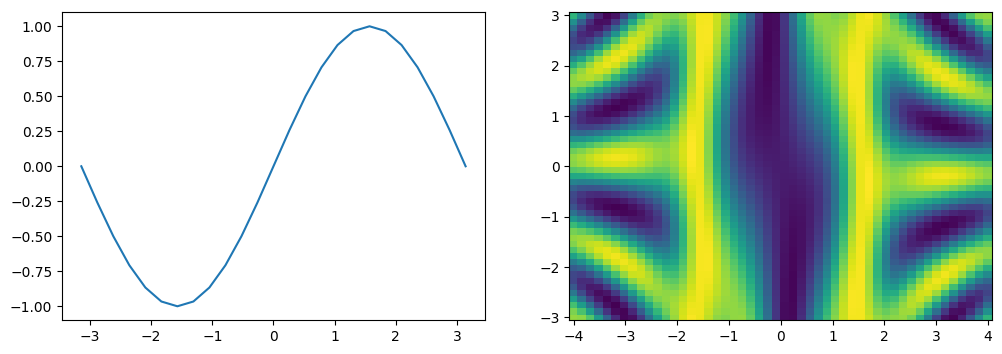

In [55]:
figsize(12,4) # longer horizontal figure dimensions
subplot(1,2,1)
plot(x,y)
subplot(1,2,2)
pcolor(x2,y2,z2)

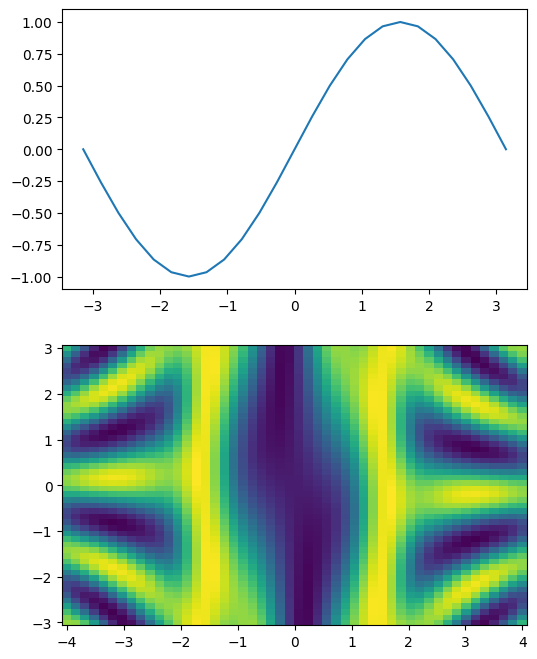

In [56]:
figsize(6,8) # longer vertical figure dimensions
subplot(2,1,1)
plot(x,y)
subplot(2,1,2)
pcolor(x2,y2,z2)

## Saving a figure

We can save our figures to image files using the `savefig()` command.

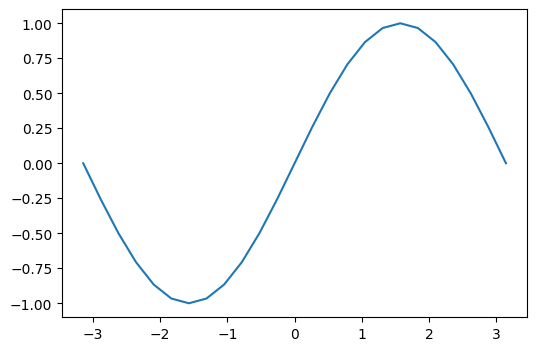

In [57]:
figsize(6,4) # setting the usual figure dimensions
plot(x,y)
savefig('my_figure.png')

## Showcase copilot

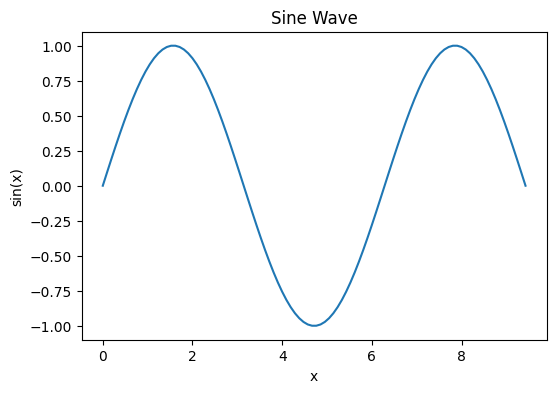

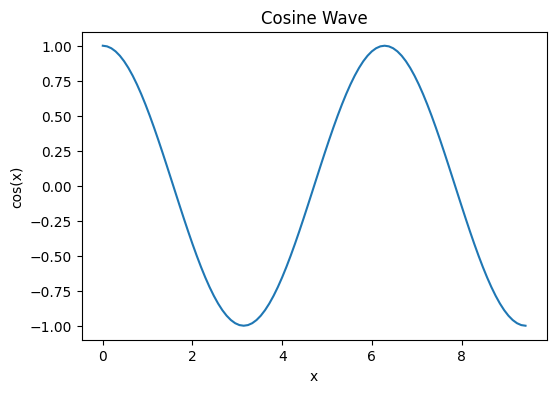

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0 to 3pi
x = np.linspace(0, 3*np.pi, 100)

# Generate y values for sine wave
y_sin = np.sin(x)

# Generate y values for cosine wave
y_cos = np.cos(x)

# Plot sine wave
plt.figure()
plt.plot(x, y_sin)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine Wave')

# Plot cosine wave
plt.figure()
plt.plot(x, y_cos)
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('Cosine Wave')

# Show the figures
plt.show()
